In [1]:
pip install geopandas pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


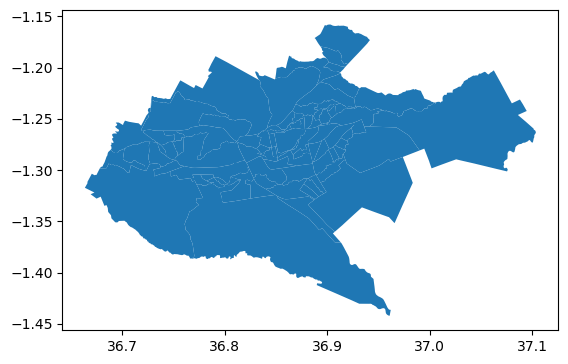

  ENGTYPE_3  HASC_3  NL_NAME_2          sum  CC_3  NL_NAME_1 TYPE_3  \
0      Ward     NaN        NaN  4399.392157  1373        NaN   Ward   
1      Ward     NaN        NaN    63.564706  1374        NaN   Ward   
2      Ward     NaN        NaN  1690.745098  1371        NaN   Ward   
3      Ward     NaN        NaN   431.007843  1375        NaN   Ward   
4      Ward     NaN        NaN  7425.756863  1372        NaN   Ward   

            NAME_2      NAME_3  Area_of_de NAME_0   NAME_1  NL_NAME_3 GID_0  \
0  Dagoretti North      Gatina    439900.0  Kenya  Nairobi        NaN   KEN   
1  Dagoretti North  Kileleshwa      6400.0  Kenya  Nairobi        NaN   KEN   
2  Dagoretti North    Kilimani    169100.0  Kenya  Nairobi        NaN   KEN   
3  Dagoretti South      Kabiro     43100.0  Kenya  Nairobi        NaN   KEN   
4  Dagoretti South  Kawangware    742600.0  Kenya  Nairobi        NaN   KEN   

   VARNAME_3         GID_3     GID_1       GID_2  \
0        NaN  KEN.30.1.1_1  KEN.30_1  KEN.30.1

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "Data/Area_of_deprived_areas.shp" 
gdf = gpd.read_file(shapefile_path)

# Plot the geometries in the GeoDataFrame
gdf.plot()
plt.show()

# Inspect the loaded data
print(gdf.head())  # View the first few rows of the data
print(gdf.columns)  # View all column names

In [3]:
import pandas as pd

# Load the CSV file
csv_data = pd.read_csv("Data/Area_of_deprived_areas.csv")

# Check if the 'Area_of_deprived_areas' column exists
if 'Area_of_deprived_areas' in csv_data.columns:
    # Perform the division and create a new column 'Deprived_population'
    csv_data['Deprived_population'] = (csv_data['Area_of_deprived_areas'] / 9.658377).astype(int)
    
    # Save the modified DataFrame to a new CSV file
    csv_data.to_csv("Deprived_population.csv", index=False)
    
    print("The file has been processed and saved as 'Deprived_population.csv'.")
else:
    print("The 'Area_of_deprived_areas' column does not exist in the CSV file.")


The file has been processed and saved as 'Deprived_population.csv'.


In [4]:
# Check if the 'Deprived_population' column exists
if 'Deprived_population' in csv_data.columns:
    # Inspect the distribution of the 'Deprived_population' column
    print("Distribution of the 'Deprived_population' column:")
    print(csv_data['Deprived_population'].describe())

    # Sort the 'Deprived_population' column in ascending order and print it
    sorted_Deprived_population = csv_data['Deprived_population'].sort_values()
    print("\nDeprived_population column sorted in ascending order:")
    print(sorted_Deprived_population)
else:
    print("The 'Deprived_population' column does not exist in the CSV file.")


Distribution of the 'Deprived_population' column:
count        84.000000
mean      34436.904762
std       26605.049639
min         662.000000
25%       13627.500000
50%       29103.500000
75%       45672.500000
max      118725.000000
Name: Deprived_population, dtype: float64

Deprived_population column sorted in ascending order:
1        662
83      2588
44      3251
25      3851
58      4338
       ...  
51     83057
27     94736
30    110401
31    116282
42    118725
Name: Deprived_population, Length: 84, dtype: int64


In [5]:
# Check if the 'Deprived_population' column exists
if 'Deprived_population' in csv_data.columns:
    # Define the bins for the ranges
    bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000]
    
    # Categorize the 'Deprived_population' column into these bins
    binned_data = pd.cut(csv_data['Deprived_population'], bins)
    
    # Calculate the frequency of each bin
    frequency = binned_data.value_counts().sort_index()
    
    print("Frequency of 'Deprived_population' within the specified ranges:")
    print(frequency)
else:
    print("The 'Deprived_population' column does not exist in the CSV file.")


Frequency of 'Deprived_population' within the specified ranges:
Deprived_population
(0, 10000]          13
(10000, 20000]      17
(20000, 30000]      13
(30000, 40000]      11
(40000, 50000]      11
(50000, 60000]       7
(60000, 70000]       3
(70000, 80000]       4
(80000, 90000]       1
(90000, 100000]      1
(100000, 110000]     0
(110000, 120000]     3
Name: count, dtype: int64


In [6]:
# Use the GID_3 column to perform a left join
merged_gdf = gdf.merge(csv_data, on="GID_3", how="left")

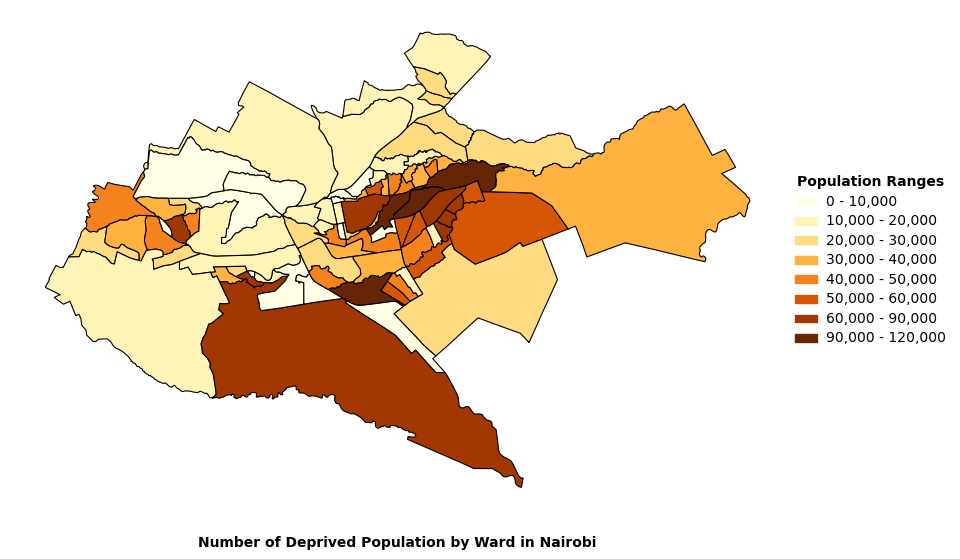

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.offsetbox import AnchoredText

# Custom color map (orange gradient)
cmap = plt.cm.YlOrBr
# YlGnBu
# Oranges
# Blues

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figure size

# Define new boundaries and normalization
boundaries = [0, 10000, 20000, 30000, 40000, 50000, 60000, 90000, 120000]
norm = mcolors.BoundaryNorm(boundaries=boundaries, ncolors=cmap.N, clip=True)

# Plot geographic boundaries and data, with pure black borders
merged_gdf.plot(column='Deprived_population', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black', norm=norm)

# Custom legend labels
labels = ['0 - 10,000', '10,000 - 20,000', '20,000 - 30,000', '30,000 - 40,000', '40,000 - 50,000', '50,000 - 60,000', '60,000 - 90,000', '90,000 - 120,000']
colors = [cmap(norm(boundaries[i])) for i in range(len(labels))]

# Create legend patches with pure black text
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
legend = ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Population Ranges', fontsize=8, frameon=False)

# Manually set the font weight for the legend title with pure black color
plt.setp(legend.get_title(), fontsize=10, fontweight='bold', color='black')
plt.setp(legend.get_texts(), fontsize=10, color='black')

# Remove axis and borders
ax.axis('off')

# Set title
plt.text(0.5, -0.05, 'Number of Deprived Population by Ward in Nairobi', fontsize=10, ha='center', va='top', transform=ax.transAxes, fontweight='bold', color='black')

# Save the figure automatically
plt.savefig('Number of Deprived Population by Ward in Nairobi.png', bbox_inches='tight', transparent=True)

# Show the map
plt.show()

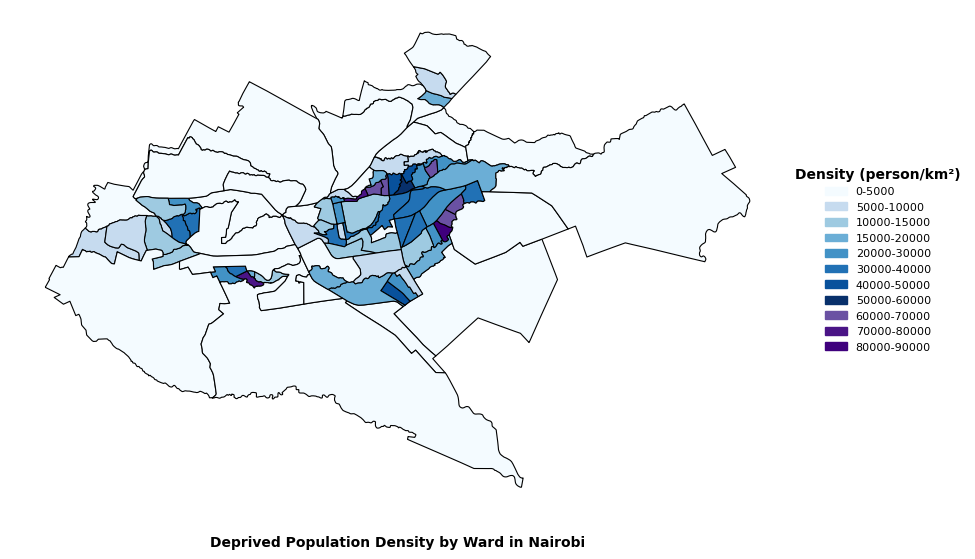

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import pandas as pd
import matplotlib.patches as mpatches

# Reproject to a suitable projected coordinate system (e.g., UTM)
gdf_projected = gdf.to_crs(epsg=32637)  # Use the EPSG code suitable for your area; here, UTM Zone 37N is used

# Calculate the area of each region (in square meters)
gdf_projected['area'] = gdf_projected['geometry'].area

# Drop the existing 'area' column if it exists to avoid conflict
if 'area' in merged_gdf.columns:
    merged_gdf = merged_gdf.drop(columns=['area'])

# Normalize the density by area
merged_gdf = merged_gdf.merge(gdf_projected[['GID_3', 'area']], on='GID_3')
merged_gdf['normalized_density'] = merged_gdf['Deprived_population'] / merged_gdf['area']

# Define the bins and labels
bins = [0, 0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-30000', '30000-40000', 
          '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000']

# Retain the original 'normalized_density' column with actual values
merged_gdf['density_range'] = pd.cut(merged_gdf['normalized_density'], bins=bins, labels=labels, right=False)

# Define a categorical colormap with deeper colors (blue to purple)
cmap = mcolors.ListedColormap(['#f4fbff', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6',
                                '#2171b5', '#08519c', '#08306b', '#6a51a3', '#4a1486', '#3f007d'])

# Plot the map using the binned density data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use the categorical colormap and plot the data
merged_gdf.plot(column='density_range', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black')

# Remove axis and borders
ax.axis('off')  # Remove the axis frame and ticks

# Create legend patches
patches = [mpatches.Patch(color=cmap(i), label=labels[i]) for i in range(len(labels))]
legend = ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Density (person/km²)', fontsize=8, frameon=False)

# Manually set the font weight for the legend title with pure black color
plt.setp(legend.get_title(), fontsize=10, fontweight='bold', color='black')

# Set title 
plt.text(0.5, -0.05, 'Deprived Population Density by Ward in Nairobi', fontsize=10, ha='center', va='top', transform=ax.transAxes, fontweight='bold', color='black')

# Save the figure automatically
plt.savefig('Deprived Population Density by Ward in Nairobi.png', bbox_inches='tight', transparent=True)

# Show the map
plt.show()


In [9]:
# Check if the 'normalized_density' column exists
if 'normalized_density' in merged_gdf.columns:
    # Multiply the 'normalized_density' values by 1,000,000 to convert to per square kilometer and convert to integers
    merged_gdf['normalized_density_km2'] = (merged_gdf['normalized_density'] * 1_000_000).round().astype(int)

    # Inspect the distribution of the new 'normalized_density_km2' column
    print("Distribution of the 'normalized_density_km2' column:")
    print(merged_gdf['normalized_density_km2'].describe())

    # Sort the 'normalized_density_km2' column in ascending order and print it
    sorted_normalized_density_km2 = merged_gdf['normalized_density_km2'].sort_values()
    print("\nNormalized_density_km2 column sorted in ascending order:")
    print(sorted_normalized_density_km2)
else:
    print("The 'normalized_density' column does not exist in the DataFrame.")


Distribution of the 'normalized_density_km2' column:
count       84.000000
mean     19912.535714
std      21041.963797
min         76.000000
25%       4211.250000
50%      13113.500000
75%      30647.000000
max      82181.000000
Name: normalized_density_km2, dtype: float64

Normalized_density_km2 column sorted in ascending order:
1        76
50      184
83      310
43      323
80      369
      ...  
10    68726
59    69132
61    73532
45    77637
12    82181
Name: normalized_density_km2, Length: 84, dtype: int64


In [10]:
import pandas as pd

# Check if the 'normalized_density_km2' column exists
if 'normalized_density_km2' in merged_gdf.columns:
    # Define the bins and labels for persons per square kilometer
    bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
    
    # Bin the data and create intervals without custom labels
    merged_gdf['density_range'] = pd.cut(merged_gdf['normalized_density_km2'], bins=bins, right=True)
    
    # Count the occurrences in each bin
    bin_counts = merged_gdf['density_range'].value_counts(sort=False)

    # Print the counts for each bin with brackets in the output
    print("Frequency of 'normalized_density_km2' in each range:")
    print(bin_counts)
else:
    print("The 'normalized_density_km2' column does not exist in the DataFrame.")


Frequency of 'normalized_density_km2' in each range:
density_range
(0, 5000]         25
(5000, 10000]     11
(10000, 15000]    10
(15000, 20000]     7
(20000, 30000]     9
(30000, 40000]    10
(40000, 50000]     3
(50000, 60000]     1
(60000, 70000]     5
(70000, 80000]     2
(80000, 90000]     1
Name: count, dtype: int64


In [11]:
# 保留 'area' 列的两位小数
merged_gdf['area'] = merged_gdf['area'].round(2)

# 保存更新后的 GeoDataFrame 到 CSV 文件
merged_gdf.to_csv("updated_normalized_density.csv", index=False)
